For Data Viz we need a Tidy Dataset

Tidy dataset is a tabular dataset where:

    each variable is a column
    each observation is a row
    each type of observational unit is a table

# Bar Charts 
A bar chart is used to depict the distribution of a categorical variable.

In [11]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

# Importing the dataset
df = pd.read_csv('pokemon.csv',index_col= "id")

In [12]:
df.head()

,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
id,,,,,,,,,,,,,
1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


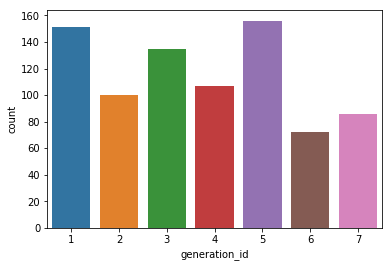

In [17]:
sb.countplot(data = df, x = 'generation_id');

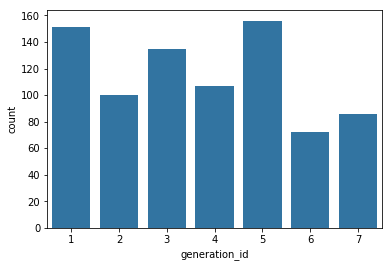

In [19]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'generation_id', color = base_color);

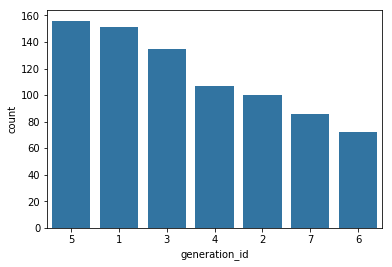

In [20]:
base_color = sb.color_palette()[0]
generation_order = df['generation_id'].value_counts().index
sb.countplot(data = df, x = 'generation_id', color = base_color, order = generation_order);

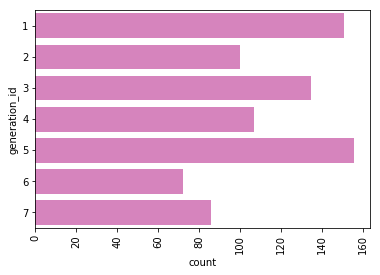

In [33]:
base_color = sb.color_palette()[6]
sb.countplot(data = df, y = 'generation_id', color = base_color);
plt.xticks(rotation = 90);

# Relative Frequency 

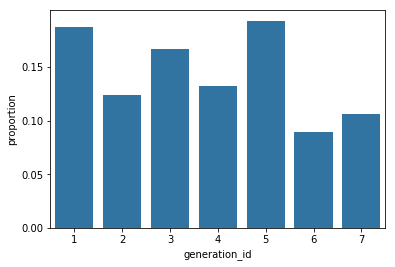

In [36]:
n_points = df.shape[0]
max_count = df['generation_id'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'generation_id', color = base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion');


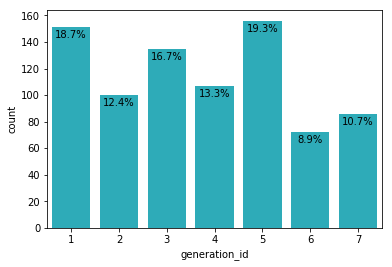

In [54]:
# create the plot
base_color = sb.color_palette()[9]
sb.countplot(data = df, x = 'generation_id', color = base_color)

# add annotations
n_points = df.shape[0]
generation_counts = df['generation_id'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = generation_counts[int(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')

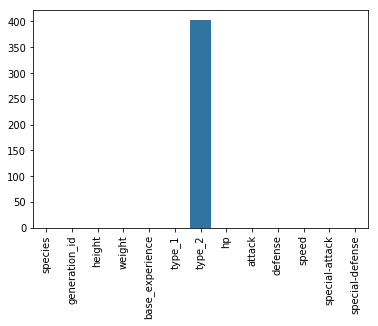

In [58]:
#finding NA Counts 
na_counts = df.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color = base_color)
plt.xticks(rotation = 90);

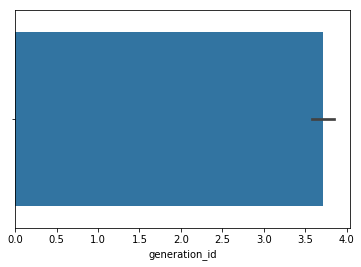

In [60]:
sb.barplot(data = df,x ='generation_id')

In [64]:
pkmn_types = df.melt(id_vars = ['species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,species,type_level,type
0,bulbasaur,type_1,grass
1,ivysaur,type_1,grass
2,venusaur,type_1,grass
3,charmander,type_1,fire
4,charmeleon,type_1,fire


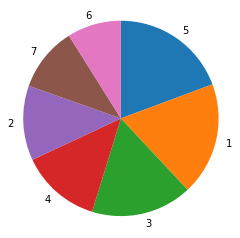

In [69]:
sorted_counts = df['generation_id'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');

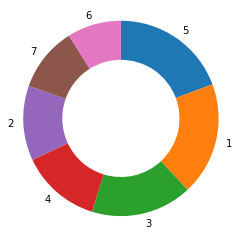

In [68]:
sorted_counts = df['generation_id'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

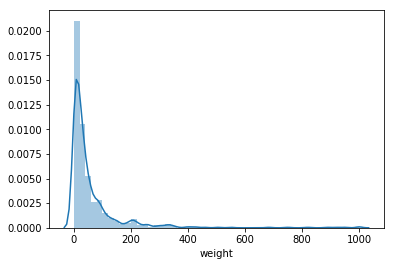

In [78]:
sb.distplot(df['weight']);

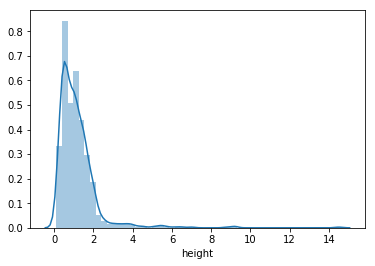

In [77]:
sb.distplot(df['height']);

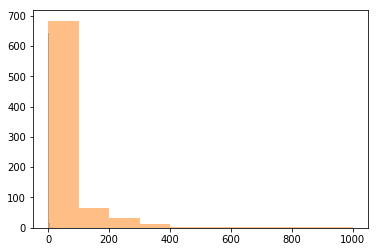

In [84]:
fig = plt.figure() #Create a Figure 
ax = fig.add_axes([.125, .125, .775, .755]) #Add axes to the figure 
ax.hist(data = df,alpha=0.5, x = 'height') #Then add plot axes
ax.hist(data = df,alpha=0.5, x = 'weight'); #Then add plot axes


# Waffle Plot

In [116]:
def percentage_blocks(df, var):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts


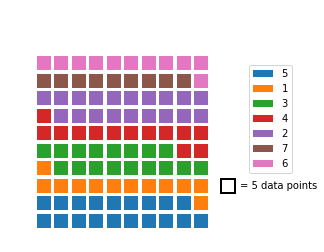

In [130]:
waffle_counts = percentage_blocks(df, 'generation_id')

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat+1])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[cat+1]
    
# box size legend
plt.bar(10.5, 0.8, 0.8, 2, color = 'white', edgecolor = 'black', lw = 2)
plt.text(11.2, 2.4,'= 5 data points', va = 'center')

plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
plt.axis('off')
plt.axis('square');